# Практическое задание № 1 по курсу ОММ

## Вариант 6
### Выполнил студент 335 группы Попов Никита

## Постановка задачи:
Используя схему бегущего счёта и итерационные методы решить задачу
    \begin{equation*}
        \begin{cases}
            \frac{\partial u}{\partial t}-(2\cdot u+t)\cdot\frac{\partial u}{\partial     x}=0\qquad -1<x<0),
            \\
            u(x;0)=1-x,
            \\
            u(0;t)=\frac{2-t^2}{4\cdot t+2}.
        \end{cases}
    \end{equation*}

### Построение характеристик:

В точках пересечения проекций его характеристик, решение будет разрывным. Посмотрим как будут вести себя проекции характеристик в заданных областях. Уравнение характеристик будет иметь вид:


$$\frac{dt}{1}=-\frac{dx}{2\cdot u+t}$$
А значит

\begin{equation*}
\begin{cases}
u=u(x_0;t_0))=const
\\
x-x_0=-2\cdot u\cdot (t-t_0)-\frac{t^2-t_0^2}{2}
\end{cases}
\end{equation*}
Воспользуемся начальным и граничным условиями для получения двух семейств кривых:

$$ 1) \qquad t_0=0 \qquad x=x_0-2\cdot (1+x_0)\cdot t-\frac{t^2}{2} $$

$$ 2) \qquad x_0=0 \qquad x= -\frac{(2-t_0^2)}{(2\cdot t_0+1)}\cdot (t-t_0)-\frac{t^2-t_0^2}{2}$$

Импортируем необходимые библиотеки

In [3]:
import numpy as np
import matplotlib.pyplot as plt

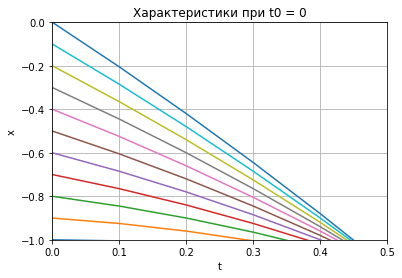

In [4]:
def char1(t):
    return [(x0-2*(x0+1)*t-t*t/2) for x0 in np.arange(-1., 0.1, 0.1)]
def char2(t):
    return [( (t0*t0-2)*(t-t0)/(2*t0+1) - (t*t - t0*t0)/2)  for t0 in np.arange(0, 11, 0.1)]
t_arr = np.arange(0, 11, 0.1)
x1_arr = np.array([char1(t) for t in t_arr])
x2_arr = np.array([char2(t) for t in t_arr])
plt.ylim(-1,0)
plt.xlim(0,0.5)
plt.plot(t_arr, x1_arr) 
plt.title('Характеристики при t0 = 0')
plt.ylabel('x')
plt.xlabel('t')
plt.grid(True)
plt.show()

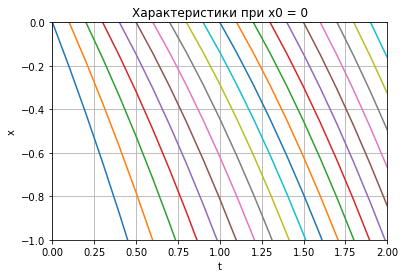

In [5]:
plt.ylim(-1,0)
plt.xlim(0,2)
plt.plot(t_arr, x2_arr) 
plt.title('Характеристики при x0 = 0')
plt.ylabel('x')
plt.xlabel('t')
plt.grid(True)
plt.show()

## Шаблон

Введём в области $\Omega = (x,t) : -1 < x \leqslant 0; 0 < t \leqslant2$ сетку с шагом $h_x$ по x и шагом $ h_t $ по t: \begin{equation*}
        \begin{cases} 
            x_n=n⋅h_x,h_x=\frac{−1}{N−1},n=\overline{0,N−1} 
            \\
            t_m=m⋅h_t,h_t=\frac{1}{M−1} ,m=\overline{0,M−1}
        \end{cases}
\end{equation*}

На $ ω_{hx, ht} $ будем рассматривать сеточную функцию $ y_{n}^m=u(x_n,t_m) $

Перепишем исходное уравнение, приведя его к дивергентному виду:
$$ \frac{\partial u}{\partial t}-\frac{\partial (u^2+t\cdot u)}{\partial x}=0 $$
Для рассматриваемой задачи будем использовать четырехточечный шаблон. Как мы потом увидим, он безусловно устойчив и аппроксимирует задачу как $ O(h_x^2+h_t^2) $. 

Таким образом, разностная схема задачи имеет вид: 
$$ \frac{y^{m+1}_n - y^m_{n} + y^{m+1}_{n+1} - y^m_{n+1}}{2h_t} - \frac{(F^{m+1}_{n+1}) - (F^{m+1}_{n}) + (F^{m}_{n+1}) - (F^{m}_{n})}{2h_x}=0 $$
Где $$ F_n^m = F(y_n^m) = ((y_n^m)^2+t\cdot y_n^m)  $$
При начальных условиях:
 \begin{equation*}
        \begin{cases}
            y_n^0=1-nh_x,
            \\
            y_0^m=\frac{2-(mh_t)^2}{4\cdot mh_t+2}.
        \end{cases}
    \end{equation*}

Разностное уравнение данной схемы есть ни что иное, как уравнение относительно $y_{n+1}^{m+1}$: $f(y_{n+1}^{m+1}) = 0$

Будем решать его итерационным методом Ньютона; запишем функцию, нуль которой необходимо найти, и её производную:
\begin{equation}
\begin{cases}
f(y_{n+1}^{m+1}) = \frac{y_n^{m+1} - y_n^m + y_{n+1}^{m+1} - y_{n+1}^m}{2\tau} - \frac{F_{n+1}^{m+1} - F_n^{m+1} + F_{n+1}^m - F_n^m}{2h}\\
f'(y_{n+1}^{m+1}) = \frac{1}{2\tau} - \frac{2\cdot y_{n+1}^{m+1}+h_t\cdot(m+1)}{2h}
\end{cases}
\end{equation}

Суть метода Ньютона заключается в итерационной последовательности $y_{n+1}^{m+1^{(s+1)}} = y_{n+1}^{m+1^{(s)}} - \frac{f(y_{n+1}^{m+1^{(s)}})}{f'(y_{n+1}^{m+1^{(s)}})}$, которая продолжается до тех пор, пока не будет достигнута необходимая точность $\varepsilon$:
\begin{equation}
|y_{n+1}^{m+1^{(s+1)}} - y_{n+1}^{m+1^{(s)}}| \leq \varepsilon
\end{equation}

## Исполняемый код

In [8]:
epsilon = 0.00001 # точность
N, M = 100, 100 # размер сетки
X_start, T_start = 0, 0 # узел сетки с координатами (0, 0)
X_end, T_end = -1., 2. # узел сетки с координатами (N, M)
hx = (X_end - X_start)/(N-1)
ht = (T_end - T_start)/(M-1)
def F(m, n):
    return ((y[m][n])**2 + m*ht*y[m][n])
def f(mp1, np1):
    n = np1-1
    m = mp1-1
    return (y[mp1][n]-y[m][n] + y[mp1][np1]-y[m][np1]) / (2.*ht) - (F(mp1, np1)-F(mp1,n) + F(m, np1)-F(m,n)) / (2.*hx)
def der_f(m1, n1):
    return (1/(2. * ht) - (2*y[m1][n1]+ht*m1)/(2. * hx))

y = np.zeros((M, N))

for m in np.arange(M):
    y[m][0] = (2-(ht*m)**2)/(4*ht*m+2)
for n in np.arange(N):
    y[0][n] = 1-n*hx
    
# метод Ньютона
for m in np.arange(M-1):
    for n in np.arange(N-1):
        eps = epsilon + 1;
        while eps > epsilon:
            ep = f(m+1, n+1)/der_f(m+1, n+1)
            y[m+1][n+1] = y[m+1][n+1] - ep
            eps = np.abs(ep)

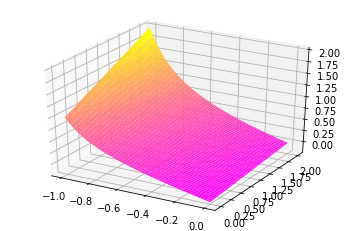

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import axes3d
x, t = np.linspace(-1,0, N), np.linspace(0, 2, M)

fig = plt.figure()
ax = fig.gca(projection='3d')
t, x = np.meshgrid(t, x)

surf = ax.plot_surface(x, t, y, cmap='spring')

In [11]:
y

array([[ 1.00000000e+00,  1.01010101e+00,  1.02020202e+00, ...,
         1.97979798e+00,  1.98989899e+00,  2.00000000e+00],
       [ 9.60968912e-01,  9.70666757e-01,  9.80369040e-01, ...,
         1.90266216e+00,  1.91237060e+00,  1.92207905e+00],
       [ 9.24478429e-01,  9.33821303e-01,  9.43158294e-01, ...,
         1.83092374e+00,  1.84026900e+00,  1.84961427e+00],
       ...,
       [-1.87024247e-01, -1.84970874e-01, -1.82917502e-01, ...,
         1.21509282e-02,  1.42045500e-02,  1.62582325e-02],
       [-1.93523833e-01, -1.91487188e-01, -1.89450544e-01, ...,
         4.02923181e-03,  6.06550995e-03,  8.10199867e-03],
       [-2.00000000e-01, -1.97979813e-01, -1.95959625e-01, ...,
        -4.04291783e-03, -2.02269080e-03, -2.75153580e-06]])

<IPython.core.display.Javascript object>


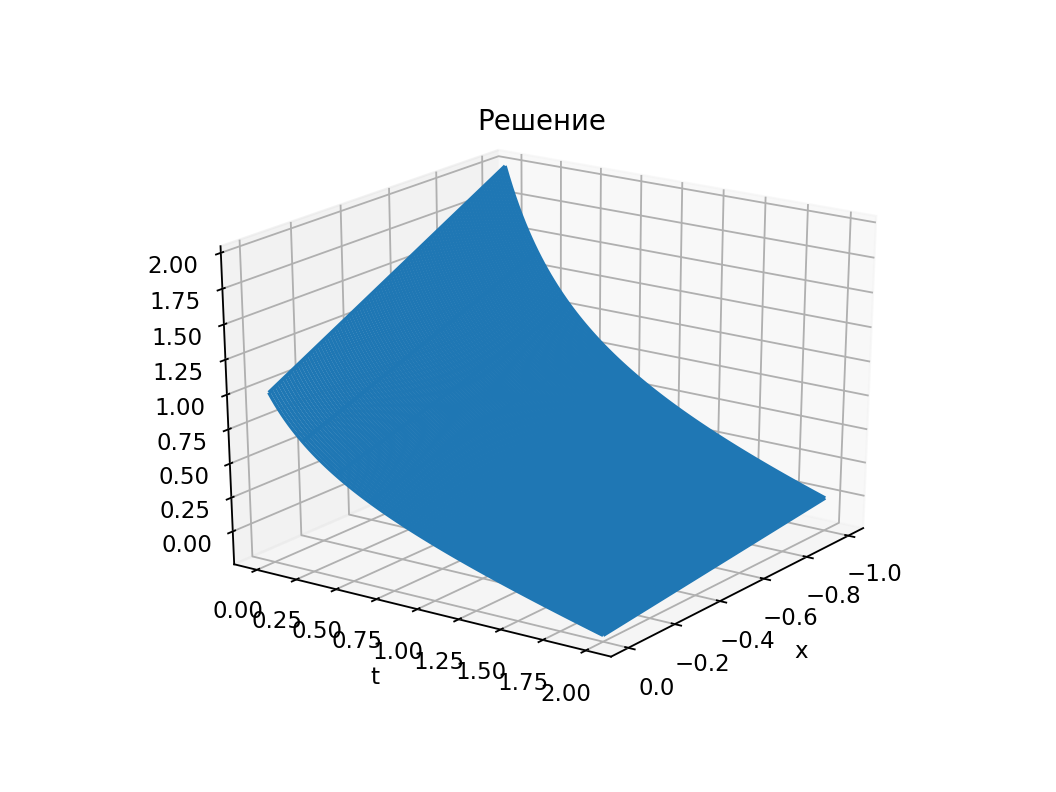

In [12]:
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

tm = np.linspace(T_start,T_end, num=M)
xn = np.linspace(X_start, X_end, num=N)

X, T = np.meshgrid(xn, tm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(X, T, y, rstride=10,cstride=1)
plt.title('Решение')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

## Устойчивость

### Критерий Неймана(необходимый)

Зафиксируем коэффициент перед $\frac{\partial u}{\partial x}$. Выберем
произвольную точку $(x_0,t_0)$ исследуемой обасти $\Omega$ и
обозначим $(-2\cdot U~+t)$ за $С$. Теперь
исследуемая схема приобретет вид: 

$$\begin{aligned}
\frac{U^{m+1}_{n+1}-U^{m}_{n+1}+U^{m+1}_{n}-U^{m}_{n}}{h_t}+C\frac{U^{m+1}_{n+1}-U^{m+1}_{n}+U^{m}_{n+1}-U^{m}_{n}}{h_x}=0\end{aligned}$$

Будем искать решение данного уравнения в виде
$U^m_{n}=\lambda^m e^{i\alpha n}$. Подставив замену в уравнение,
получим: 

$$\begin{aligned}
\lambda e^{i\alpha}-e^{i\alpha}+\lambda -1+\frac{Ch_t}{h_x}(\lambda e^{i\alpha}- \lambda + e^{i\alpha}-1)=0\end{aligned}$$


Тогда для $\lambda$ получим: 

$$\begin{aligned}
\lambda = \frac{e^{i\alpha}+1+\frac{Ch_t}{h_x}(1-e^{i\alpha})}{e^{i\alpha}+1+\frac{Ch_t}{h_x}(e^{i\alpha}-1)}\end{aligned}$$

$$\begin{aligned}
|\lambda | = 1\end{aligned}$$

Из данного соотношения получаем, что
условие $|\lambda(\alpha)|\leq1$ справедливо для любых соотношений шагов по
координате и времени, и, следовательно, спектральный критерий Неймана
выполнен.

### Критерий Куранта(достаточный)

Перепишем исследуемую разностную схему, поставив для нее задачу в виде:

$$\begin{aligned}
\begin{cases}
\frac{U^{m+1}_{n+1}~~-~U^{m}_{n+1}~~+~U^{m+1}_{n}~~-~U^{m}_{n}}{h_t}~~+~C\frac{U^{m+1}_{n+1}~~-~U^{m+1}_{n}~~+~U^{m}_{n+1}~~-~U^{m}_{n}}{h_x}=\epsilon ^{m}_n\\
U^{0}_n=\phi _n\\
U^{m}_0=\mu ^{m}
\end{cases}\end{aligned}$$ 

Преобразуем уравнение к виду:

$$\begin{aligned}
U^{m+1}_{n+1}(1+\frac{Ch_t}{h_x})+U^{m+1}_n(1-\frac{Ch_t}{h_x})=U^{m}_{n+1}(1-\frac{Ch_t}{h_x})+U^{m}_n(1+\frac{Ch_t}{h_x})+h_t \epsilon ^{m}_n\end{aligned},$$где $\epsilon ^{m}_n$ - некоторое возмущение исходной схемы. 

Оценим данное соотношение по равномерной норме: 

$$\begin{aligned}
\|U^{m+1}\|(1+\frac{Ch_t}{h_x})+\|U^{m+1}\|(1-\frac{Ch_t}{h_x}) \leq 
\|U^{m}\|(1-\frac{Ch_t}{h_x})+\|U^{m}\|(1+\frac{Ch_t}{h_x})+h_t \|\epsilon ^{m}\| \notag\end{aligned}$$

$$\begin{aligned}
2\|U^{m+1}\|\leq 2\|U^{m}\| + h_t\|\epsilon\|\end{aligned}$$ 

Тогда по
индукции получаем: $$\begin{aligned}
\| U^m\| \leq \|\phi\| + \frac{mh_t}{2}\|\epsilon\| \\
\| U^m\| \leq \|\phi\| + \frac{T}{2}\|\epsilon\|\end{aligned}$$

Переобозначая: 

$$\begin{aligned}
\| U^m\| \leq \ M|\phi\| + N\|\epsilon\|\end{aligned},$$ 
где $T$ - величина
интервала времени, на котором мы ищем решение, а $M$ и $N$ - константы, не
зависящие от шагов сетки. 

Таким образом получаем, что и критерий Куранта
выполнен для рассматриваемой схемы для любых соотношений шагов по
времени и координате, то есть фактически выполнено определение
устойчивости.


## Порядок аппроксимации


Вычислим порядок аппроксимации. Для этого разложим значения
функции $U$ в узлах сетки в ряд до члена третьего порядка включительно в
точке $(x_n+\frac{h_x}{2};t_m+\frac{h_t}{2})$: 

$$\begin{aligned}
U^{m+1} = U^{m+0.5}+\frac{h_t}{2}U'~^{m+0.5} + \frac{1}{2}\frac{h^{2}_t}{4} U''~^{m+0.5}+\frac{1}{6}\frac{h^{3}_t}{8}U'''~^{m+0.5} + O(h^{4}_t)\\
U^{m} = U^{m+0.5}-\frac{h_t}{2}U'~^{m+0.5}+\frac{1}{2}\frac{h^{2}_t}{4} U''~^{m+0.5}-\frac{1}{6}\frac{h^{3}_t}{8}U'''~^{m+0.5} + O(h^{4}_t)\\
U_{n+1} = U_{n+0.5}+\frac{h_x}{2}U'_{n+0.5}+\frac{1}{2}\frac{h^{2}_x}{4} U''_{n+0.5}+\frac{1}{6}\frac{h^{3}_x}{8}U'''_{n+0.5} + O(h^{4}_x)\\
U_{n} = U_{n+0.5}-\frac{h_x}{2}U'_{n+0.5}+\frac{1}{2}\frac{h^{2}_x}{4} U''_{n+0.5}-\frac{1}{6}\frac{h^{3}_x}{8}U'''_{n+0.5} + O(h^{4}_x)
\end{aligned}$$

Из данных соотношений получим: 

$$\begin{aligned}
\frac{U^{m+1}_{n+1}-U^{m}_{n+1}+U^{m+1}_n-U^{m}_n}{h_t} +C\frac{U^{m+1}_{n+1}-U^{m+1}_{n}+U^{m}_{n+1}-U^{m}_{n}}{h_x} -\frac{\partial U}{\partial t} -C\frac{\partial U}{\partial x}=O(h^{2}_t + h^{2}_x) \end{aligned}$$